# BME 6938 Homework 3

## Part a) Load the dataset in an iPython notebook [2 point].

Read the data file

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('HW3Data.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0,2.080754,1.099069,0.927763,1.029081,-0.130763,1.265460,-0.436286,0.728881,2.107979,...,-0.825403,-0.138451,0.382957,0.876697,-0.216234,-1.408300,0.393327,-0.148522,1.591533,-0.217481
1,1,1.109457,0.786453,0.445560,-0.146323,-0.996316,0.555759,0.290734,-0.145259,1.132660,...,-1.056288,-0.205499,-1.815374,0.324373,-1.296909,-0.870757,1.108739,1.094010,-0.492141,-1.554079
2,0,-0.676530,1.693100,1.559247,1.559983,-0.982179,-1.358507,-1.313994,-0.455067,0.295214,...,1.242968,1.230157,-2.038999,2.366093,0.820656,1.404501,0.176860,-0.086285,-0.390878,-0.089465
3,1,0.534396,1.677537,1.489030,0.778605,-0.183776,-1.116850,-1.487557,-0.579511,0.292683,...,0.559852,-0.593149,-4.440577,1.720705,-0.124617,-0.435880,0.228440,-0.893938,1.005879,-0.631247
4,0,-1.018903,0.511080,0.755641,1.013816,0.529899,0.160440,-0.087055,1.295290,0.458736,...,0.227110,0.497628,-0.083921,-0.382733,-0.913389,1.122928,0.834571,-0.283786,-2.860340,0.280871


Add descriptions/headers on top of the data table. The first column tells us whether each sample is from a tumor biopsy.

In [2]:
genes = np.genfromtxt('Genes.txt',delimiter='\n',dtype = str)
data.columns = np.append('Biopsy yes/no',genes)
data

,Biopsy yes/no,Hsa.3004 H55933 3' UTR 1 203417 H.sapiens mRNA for homologue to yeast ribosomal protein L41.,Hsa.13491 R39465 3' UTR 2a 23933 EUKARYOTIC INITIATION FACTOR 4A (Oryctolagus cuniculus),Hsa.13491 R39465 3' UTR 2a 23933 EUKARYOTIC INITIATION FACTOR 4A (Oryctolagus cuniculus),Hsa.37254 R85482 3' UTR 2a 180093 SERUM RESPONSE FACTOR (Homo sapiens),"Hsa.541 U14973 gene 1 ""Human ribosomal protein S29 mRNA, complete cds. """,Hsa.20836 R02593 3' UTR 2a 124094 60S ACIDIC RIBOSOMAL PROTEIN P1 (Polyorchis penicillatus),Hsa.1977 T51496 3' UTR 1 71488 60S RIBOSOMAL PROTEIN L37A (HUMAN).,Hsa.44472 H80240 3' UTR 2a 240814 INTER-ALPHA-TRYPSIN INHIBITOR COMPLEX COMPONENT II PRECURSOR (Homo sapiens),Hsa.3087 T65938 3' UTR 1 81639 TRANSLATIONALLY CONTROLLED TUMOR PROTEIN (HUMAN);.,...,Hsa.2618 X67699 gene 1 H.sapiens HE5 mRNA for CDw52 antigen.,Hsa.27285 R70790 3' UTR 2a 142585 GTP:AMP PHOSPHOTRANSFERASE MITOCHONDRIAL (Rattus norvegicus),"Hsa.41260 L11706 gene 1 ""Human hormone-sensitive lipase (LIPE) gene, complete cds. """,Hsa.14822 T90549 3' UTR 2a 110713 P-SELECTIN PRECURSOR (Homo sapiens),Hsa.336 D17390 gene 1 Human mRNA for MDC protein.,"Hsa.984 M33210 gene 1 ""Human colony stimulating factor 1 receptor (CSF1R) gene, exon 5. """,Hsa.35124 H18490 3' UTR 2a 171840 RAN GTPASE ACTIVATING PROTEIN 1 (Mus musculus),Hsa.3952 H40891 3' UTR 2a 175983 NODULATION PROTEIN Q (Azospirillum brasilense),Hsa.32734 R77780 3' UTR 2a 145300 TRANSPOSABLE ELEMENT ACTIVATOR (Zea mays),Hsa.9683 T49647 3' UTR 2a 67762 MYRISTOYLATED ALANINE-RICH C-KINASE SUBSTRATE (Homo sapiens)
0,0,2.080754,1.099069,0.927763,1.029081,-0.130763,1.265460,-0.436286,0.728881,2.107979,...,-0.825403,-0.138451,0.382957,0.876697,-0.216234,-1.408300,0.393327,-0.148522,1.591533,-0.217481
1,1,1.109457,0.786453,0.445560,-0.146323,-0.996316,0.555759,0.290734,-0.145259,1.132660,...,-1.056288,-0.205499,-1.815374,0.324373,-1.296909,-0.870757,1.108739,1.094010,-0.492141,-1.554079
2,0,-0.676530,1.693100,1.559247,1.559983,-0.982179,-1.358507,-1.313994,-0.455067,0.295214,...,1.242968,1.230157,-2.038999,2.366093,0.820656,1.404501,0.176860,-0.086285,-0.390878,-0.089465
3,1,0.534396,1.677537,1.489030,0.778605,-0.183776,-1.116850,-1.487557,-0.579511,0.292683,...,0.559852,-0.593149,-4.440577,1.720705,-0.124617,-0.435880,0.228440,-0.893938,1.005879,-0.631247
4,0,-1.018903,0.511080,0.755641,1.013816,0.529899,0.160440,-0.087055,1.295290,0.458736,...,0.227110,0.497628,-0.083921,-0.382733,-0.913389,1.122928,0.834571,-0.283786,-2.860340,0.280871
5,1,-1.185369,-0.514473,-0.566634,1.224720,0.619244,-0.684713,-0.798129,1.368770,-0.697007,...,0.926855,0.302304,0.302785,-1.170087,-1.189162,0.418884,-2.247347,-0.455263,-1.528083,0.327891
6,0,1.779054,0.423947,0.820696,2.525687,0.666921,0.661346,0.425365,0.165247,1.967905,...,0.284194,-0.555516,-1.455897,-0.240853,0.249138,-0.915572,-0.764530,-0.808293,0.003886,-0.379341
7,1,-0.889638,-0.315453,-0.073131,1.157503,-0.311039,-0.364472,-1.621636,1.192999,0.689805,...,-0.113531,-0.485290,-0.094577,-0.809093,0.453226,-0.009268,-0.872640,-1.730826,0.665384,0.977573
8,0,-0.659694,-0.184388,-0.540022,1.122418,0.562609,-2.988315,-2.349808,-1.325007,-0.017002,...,-0.819396,-0.952811,0.065197,0.985648,0.745522,0.508879,0.846929,0.644346,0.156497,-0.147716
9,1,-1.225801,-0.212615,-0.588923,1.335412,-0.356505,0.354394,0.699607,0.190782,-0.139117,...,1.772469,0.804056,-0.361595,-0.975587,-0.652528,-0.106173,-0.613650,-0.886065,0.645764,0.142760


## Part b) Use the Recursive Feature Elimination method (REF) with cross-validation here, and show a plot to demonstrate the performance versus number of selected features [11 points].

Feature selection is an important machine-learning task that allows us to select the most important features in a given dataset. Scikit-learn provides multiple methods for choosing the best features.

Split the data into "Labels" and "Features", so we can split it into training and testing sets. 

In [3]:
Labels = data.iloc[:,0].values
Features = data.iloc[:,1:].values

Split training and test data 80/20.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(Features, Labels,  
                     test_size=0.20,   
                     stratify= Labels,
                     random_state=0)

Examine the shape of the labels and features of both training and test sets

In [5]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (49, 2000)
y_train shape:  (49,)
X_test shape:  (13, 2000)
y_test shape:  (13,)


Perform Recursive Feature Elimination (RFE) with cross-validation.
Code source: http://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [6]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
svc = SVC(kernel="linear")

The "accuracy" scoring is proportional to the number of correct classifications

In [7]:
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 9


Plot number of features VS. cross-validation scores

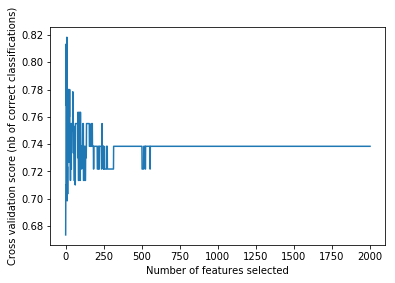

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Part c) Use   the   holdout   method   for  testingushing   only   the   selected   features.Report the performance.[5 points].

Use the SVC model to fit the trainning data based on the best features selected by Recursive Feature Elimination. 

In [12]:
svc.fit(X_train[:,rfecv.support_],y_train)
y_prediction = svc.predict(X_test[:,rfecv.support_])


Examine the test accuracy and visually compare the differences between 13 disease prediction and actual results

In [13]:
print('The test accuracy is %f' % svc.score(X_test[:,rfecv.support_], y_test))
print('Disease Predictions: ',y_prediction)
print('Actual results:',y_test)

The test accuracy is 0.923077
Disease Predictions:  [1 0 0 1 0 0 1 0 1 0 0 0 0]
Actual results: [1 0 0 1 0 0 1 0 1 1 0 0 0]
